In [1]:
from keras.applications.xception import Xception
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras import applications
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
base_model = applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
# for layer in base_model.layers:
#     print(layer.trainable)

In [4]:
x = base_model.output
x = Flatten()(x)
x = Dense(4096, name='fc1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, name='fc2')(x)


#predictions = Dense(2, activation="softmax") (x)
#predictions = Dense(1, activation="sigmoid") (x)
x = Dense(10, activation='softmax', name='predictions')(x)


model_final = Model(inputs=base_model.input, outputs=x)
#model_final.compile(loss="categorical_crossentropy", optimizer=optimizers.sgd(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=0.00001), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
weights_file = 'vgg16_clothing_classifier_1.h5'
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range =.2,
                                  zoom_range = .2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_data_dir = 'data/train'
validation_data_dir = "data/validation"
nb_validation_samples = 1000
nb_train_samples = 5000
epochs = 10
batch_size = 16
img_width, img_height = 224, 224

train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(img_width, img_height),
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=True)

val_generator = val_datagen.flow_from_directory(
                                validation_data_dir,
                                target_size = (img_height, img_width),
                                batch_size=batch_size,
                                class_mode = "categorical")

checkpoint = ModelCheckpoint(weights_file, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Train the model 
history = model_final.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps=nb_validation_samples//batch_size,
            verbose=1,
            workers=4,
            callbacks = [checkpoint, early])

Found 5000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/10
312/312 [==============================] - 264s - loss: 1.4333 - acc: 0.5288 - val_loss: 1.4104 - val_acc: 0.5302
Epoch 2/10
114/312 [=========>....................] - ETA: 139s - loss: 0.9560 - acc: 0.6848

KeyboardInterrupt: 

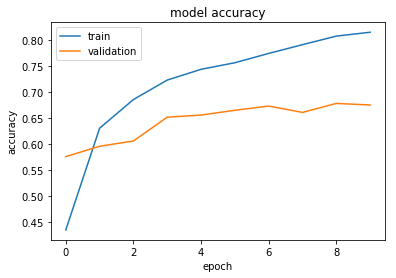

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save_weights(weights_file)

### Activation = Relu, no dropout, 256 per layer, 2 layers
- Epoch 1/5
311/312 [============================>.] - ETA: 0s - loss: 1.7618 - acc: 0.4528
Epoch 00000: val_acc improved from -inf to 0.53327, saving model to vgg16_1.h5
312/312 [==============================] - 196s - loss: 1.7600 - acc: 0.4533 - val_loss: 1.5181 - val_acc: 0.5333
- Epoch 2/5
311/312 [============================>.] - ETA: 0s - loss: 1.2145 - acc: 0.6290
Epoch 00001: val_acc improved from 0.53327 to 0.59350, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 1.2146 - acc: 0.6290 - val_loss: 1.2554 - val_acc: 0.5935
- Epoch 3/5
311/312 [============================>.] - ETA: 0s - loss: 1.0157 - acc: 0.6752
Epoch 00002: val_acc improved from 0.59350 to 0.60976, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 1.0155 - acc: 0.6747 - val_loss: 1.1297 - val_acc: 0.6098
- Epoch 4/5
311/312 [============================>.] - ETA: 0s - loss: 0.8905 - acc: 0.7176
Epoch 00003: val_acc improved from 0.60976 to 0.63008, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 0.8908 - acc: 0.7175 - val_loss: 1.0924 - val_acc: 0.6301
- Epoch 5/5
311/312 [============================>.] - ETA: 0s - loss: 0.8147 - acc: 0.7381
Epoch 00004: val_acc improved from 0.63008 to 0.67988, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 0.8159 - acc: 0.7376 - val_loss: 0.9710 - val_acc: 0.6799

### Activation = Relu, dropout = 0.2 , 256 per layer, 2 layers
- Epoch 1/5
311/312 [============================>.] - ETA: 0s - loss: 1.8920 - acc: 0.3559 Epoch 00000: val_acc improved from -inf to 0.50000, saving model to vgg16_1.h5
312/312 [==============================] - 196s - loss: 1.8911 - acc: 0.3560 - val_loss: 1.5996 - val_acc: 0.5000
- Epoch 2/5
311/312 [============================>.] - ETA: 0s - loss: 1.4099 - acc: 0.5324
Epoch 00001: val_acc improved from 0.50000 to 0.57114, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 1.4097 - acc: 0.5327 - val_loss: 1.3624 - val_acc: 0.5711
- Epoch 3/5
311/312 [============================>.] - ETA: 0s - loss: 1.1902 - acc: 0.6154
Epoch 00002: val_acc improved from 0.57114 to 0.60976, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 1.1899 - acc: 0.6154 - val_loss: 1.1734 - val_acc: 0.6098
- Epoch 4/5
311/312 [============================>.] - ETA: 0s - loss: 1.0636 - acc: 0.6555
Epoch 00003: val_acc improved from 0.60976 to 0.61890, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 1.0633 - acc: 0.6557 - val_loss: 1.1114 - val_acc: 0.6189
- Epoch 5/5
311/312 [============================>.] - ETA: 0s - loss: 0.9644 - acc: 0.6855
Epoch 00004: val_acc improved from 0.61890 to 0.64837, saving model to vgg16_1.h5
312/312 [==============================] - 195s - loss: 0.9647 - acc: 0.6855 - val_loss: 1.0660 - val_acc: 0.6484


### Activation = Relu, dropout = 0.2 , 4096 per layer, 2 layers, 10 epochs
- Epoch 1/10
311/312 [============================>.] - ETA: 0s - loss: 1.6946 - acc: 0.4343Epoch 00000: val_acc improved from -inf to 0.57560, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 229s - loss: 1.6939 - acc: 0.4351 - val_loss: 1.4136 - val_acc: 0.5756
- Epoch 2/10
311/312 [============================>.] - ETA: 0s - loss: 1.1629 - acc: 0.6308Epoch 00001: val_acc improved from 0.57560 to 0.59553, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 1.1622 - acc: 0.6300 - val_loss: 1.1944 - val_acc: 0.5955
- Epoch 3/10
311/312 [============================>.] - ETA: 0s - loss: 0.9827 - acc: 0.6851Epoch 00002: val_acc improved from 0.59553 to 0.60569, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 235s - loss: 0.9821 - acc: 0.6853 - val_loss: 1.1276 - val_acc: 0.6057
- Epoch 4/10
311/312 [============================>.] - ETA: 0s - loss: 0.8713 - acc: 0.7221Epoch 00003: val_acc improved from 0.60569 to 0.65142, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 235s - loss: 0.8709 - acc: 0.7226 - val_loss: 0.9978 - val_acc: 0.6514
- Epoch 5/10
311/312 [============================>.] - ETA: 0s - loss: 0.7974 - acc: 0.7428Epoch 00004: val_acc improved from 0.65142 to 0.65549, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 235s - loss: 0.7966 - acc: 0.7432 - val_loss: 1.0205 - val_acc: 0.6555
- Epoch 6/10
311/312 [============================>.] - ETA: 0s - loss: 0.7460 - acc: 0.7556Epoch 00005: val_acc improved from 0.65549 to 0.66463, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 235s - loss: 0.7471 - acc: 0.7556 - val_loss: 0.9355 - val_acc: 0.6646
- Epoch 7/10
311/312 [============================>.] - ETA: 0s - loss: 0.6910 - acc: 0.7737Epoch 00006: val_acc improved from 0.66463 to 0.67276, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 235s - loss: 0.6905 - acc: 0.7740 - val_loss: 0.9172 - val_acc: 0.6728
- Epoch 8/10
311/312 [============================>.] - ETA: 0s - loss: 0.6558 - acc: 0.7902Epoch 00007: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.6557 - acc: 0.7903 - val_loss: 0.9853 - val_acc: 0.6606
- Epoch 9/10
311/312 [============================>.] - ETA: 0s - loss: 0.6148 - acc: 0.8069Epoch 00008: val_acc improved from 0.67276 to 0.67785, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.6137 - acc: 0.8073 - val_loss: 0.8573 - val_acc: 0.6778
- Epoch 10/10
311/312 [============================>.] - ETA: 0s - loss: 0.5847 - acc: 0.8143Epoch 00009: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.5844 - acc: 0.8145 - val_loss: 0.9304 - val_acc: 0.6748

### Activation = None, dropout = 0.2 , 4096 per layer, 2 layers, 10 epochs
Found 1000 images belonging to 10 classes.
- Epoch 1/10
311/312 [============================>.] - ETA: 0s - loss: 1.5095 - acc: 0.5028Epoch 00000: val_acc improved from -inf to 0.56048, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 245s - loss: 1.5080 - acc: 0.5032 - val_loss: 1.2566 - val_acc: 0.5605
- Epoch 2/10
311/312 [============================>.] - ETA: 0s - loss: 0.9448 - acc: 0.6819Epoch 00001: val_acc improved from 0.56048 to 0.63008, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.9436 - acc: 0.6825 - val_loss: 1.0815 - val_acc: 0.6301
- Epoch 3/10
311/312 [============================>.] - ETA: 0s - loss: 0.7636 - acc: 0.7434Epoch 00002: val_acc improved from 0.63008 to 0.64939, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.7633 - acc: 0.7432 - val_loss: 0.9501 - val_acc: 0.6494
- Epoch 4/10
311/312 [============================>.] - ETA: 0s - loss: 0.6875 - acc: 0.7715Epoch 00003: val_acc improved from 0.64939 to 0.66870, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.6888 - acc: 0.7708 - val_loss: 0.9157 - val_acc: 0.6687
- Epoch 5/10
311/312 [============================>.] - ETA: 0s - loss: 0.5902 - acc: 0.8016Epoch 00004: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.5889 - acc: 0.8023 - val_loss: 1.0242 - val_acc: 0.6524
- Epoch 6/10
311/312 [============================>.] - ETA: 0s - loss: 0.5565 - acc: 0.8079Epoch 00005: val_acc improved from 0.66870 to 0.71037, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.5558 - acc: 0.8081 - val_loss: 0.8513 - val_acc: 0.7104
- Epoch 7/10
311/312 [============================>.] - ETA: 0s - loss: 0.5050 - acc: 0.8338Epoch 00006: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.5053 - acc: 0.8339 - val_loss: 0.9394 - val_acc: 0.6646
- Epoch 8/10
311/312 [============================>.] - ETA: 0s - loss: 0.4767 - acc: 0.8418Epoch 00007: val_acc improved from 0.71037 to 0.71138, saving model to vgg16_clothing_classifier_0.h5
312/312 [==============================] - 234s - loss: 0.4769 - acc: 0.8419 - val_loss: 0.8515 - val_acc: 0.7114
- Epoch 9/10
311/312 [============================>.] - ETA: 0s - loss: 0.4295 - acc: 0.8579Epoch 00008: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.4289 - acc: 0.8584 - val_loss: 0.9653 - val_acc: 0.6514
- Epoch 10/10
311/312 [============================>.] - ETA: 0s - loss: 0.3952 - acc: 0.8740Epoch 00009: val_acc did not improve
312/312 [==============================] - 226s - loss: 0.3949 - acc: 0.8738 - val_loss: 0.8268 - val_acc: 0.7063
